In [94]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

In [95]:
n_samples = 100_000

# Bernoulli

In [96]:
def plot_confidence_interval(ax, mean, std, n, alpha=0.05, color='red', label=''):
    z = ss.norm.ppf(1 - alpha/2)
    margin = z * std / np.sqrt(n)
    ax.axvline(mean - margin, color=color, linestyle='--', alpha=0.7, label=f'{label} 95% ДИ')
    ax.axvline(mean + margin, color=color, linestyle='--', alpha=0.7)
    ax.axvspan(mean - margin, mean + margin, color=color, alpha=0.1)

In [97]:
p = 0.5

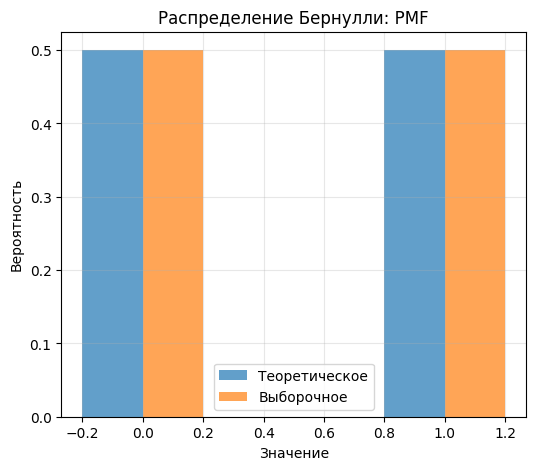

In [98]:
sample_bernoulli = np.random.binomial(1, p, n_samples)

# Теоретическое распределение Бернулли
x_bernoulli = np.array([0, 1])
theoretical_pmf_bernoulli = [1-p, p]

# Выборочное распределение
unique, counts = np.unique(sample_bernoulli, return_counts=True)
empirical_pmf_bernoulli = counts / n_samples

plt.figure(figsize=(6, 5))
plt.bar(x_bernoulli - 0.1, theoretical_pmf_bernoulli, width=0.2, alpha=0.7, label='Теоретическое')
plt.bar(x_bernoulli + 0.1, empirical_pmf_bernoulli, width=0.2, alpha=0.7, label='Выборочное')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Распределение Бернулли: PMF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

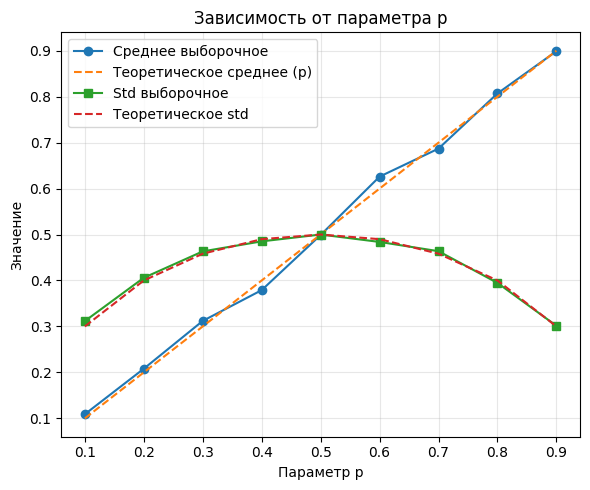

In [99]:
# Зависимость среднего и std от параметра p
p_values = np.linspace(0.1, 0.9, 9)
means_bernoulli = []
stds_bernoulli = []

for p_val in p_values:
    sample = np.random.binomial(1, p_val, 1000)
    means_bernoulli.append(np.mean(sample))
    stds_bernoulli.append(np.std(sample))
plt.figure(figsize=(6, 5))
plt.plot(p_values, means_bernoulli, 'o-', label='Среднее выборочное')
plt.plot(p_values, p_values, '--', label='Теоретическое среднее (p)')
plt.plot(p_values, stds_bernoulli, 's-', label='Std выборочное')
plt.plot(p_values, np.sqrt(p_values * (1-p_values)), '--', label='Теоретическое std')
plt.xlabel('Параметр p')
plt.ylabel('Значение')
plt.title('Зависимость от параметра p')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [100]:
# Доверительный интервал для Бернулли
sample_mean_bernoulli = np.mean(sample_bernoulli)
sample_std_bernoulli = np.std(sample_bernoulli)
theoretical_mean_bernoulli = p
theoretical_std_bernoulli = np.sqrt(p * (1-p))

print(f"Выборочное среднее: {sample_mean_bernoulli:.4f}, Теоретическое: {theoretical_mean_bernoulli:.4f}")
print(f"Выборочное std: {sample_std_bernoulli:.4f}, Теоретическое: {theoretical_std_bernoulli:.4f}")

Выборочное среднее: 0.5001, Теоретическое: 0.5000
Выборочное std: 0.5000, Теоретическое: 0.5000


# Binomial

In [101]:
n_binom = 20 
p_binom = 0.4 
sample_size_binom = 100_000
sample_binom = np.random.binomial(n_binom, p_binom, sample_size_binom)

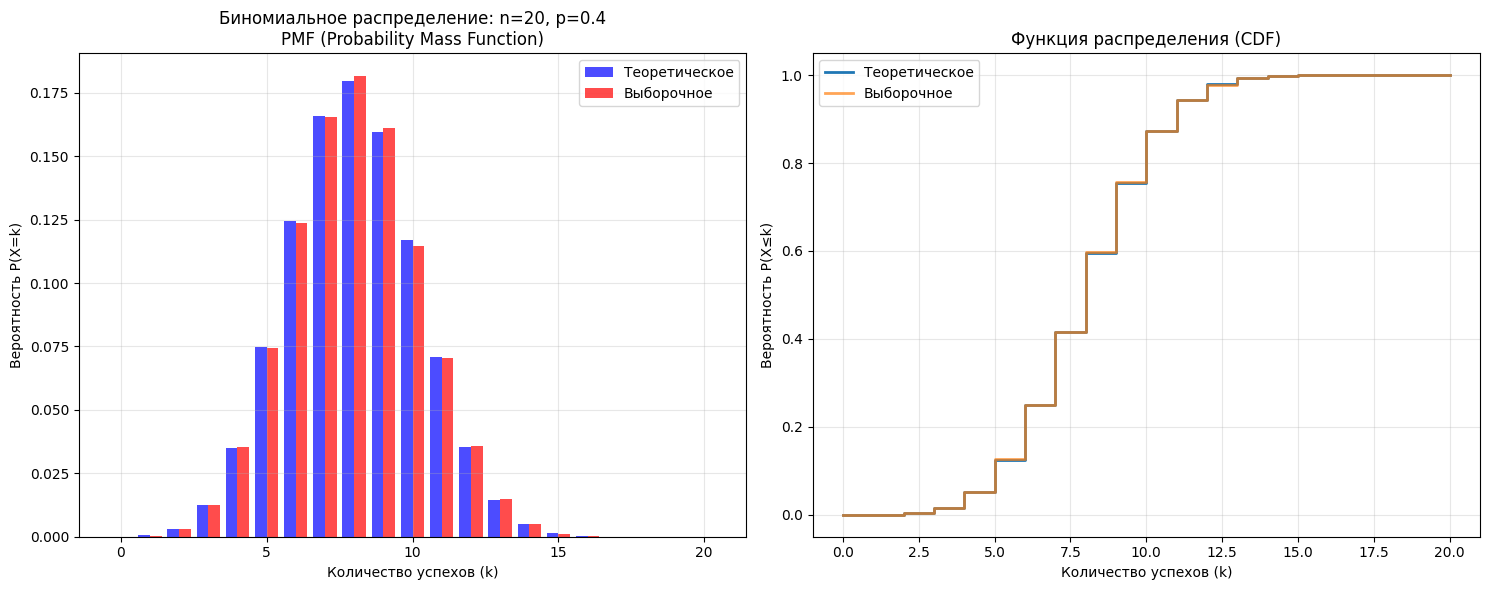

Параметры распределения: n = 20, p = 0.4
Объем выборки: 100000
Выборочное среднее: 7.9973
Теоретическое среднее (np): 8.0000
Выборочное СКО: 2.1932
Теоретическое СКО (√(np(1-p))): 2.1909


In [102]:
x_binom = np.arange(0, n_binom + 1)
theoretical_pmf_binom = ss.binom.pmf(x_binom, n_binom, p_binom)

# Выборочное распределение
unique_binom, counts_binom = np.unique(sample_binom, return_counts=True)
empirical_pmf_binom = np.zeros_like(x_binom, dtype=float)
for i, val in enumerate(x_binom):
    if val in unique_binom:
        idx = np.where(unique_binom == val)[0][0]
        empirical_pmf_binom[i] = counts_binom[idx] / sample_size_binom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. PMF - теоретическое и выборочное распределение вероятностей
ax1.bar(x_binom - 0.2, theoretical_pmf_binom, width=0.4, alpha=0.7, 
        label='Теоретическое', color='blue')
ax1.bar(x_binom + 0.2, empirical_pmf_binom, width=0.4, alpha=0.7, 
        label='Выборочное', color='red')
ax1.set_xlabel('Количество успехов (k)')
ax1.set_ylabel('Вероятность P(X=k)')
ax1.set_title(f'Биномиальное распределение: n={n_binom}, p={p_binom}\nPMF (Probability Mass Function)')
ax1.legend()
ax1.grid(True, alpha=0.3)
# 2. CDF - теоретическая и выборочная функция распределения
theoretical_cdf_binom = ss.binom.cdf(x_binom, n_binom, p_binom)
empirical_cdf_binom = np.cumsum(empirical_pmf_binom)

ax2.step(x_binom, theoretical_cdf_binom, where='post', label='Теоретическое', linewidth=2)
ax2.step(x_binom, empirical_cdf_binom, where='post', label='Выборочное', linewidth=2, alpha=0.7)
ax2.set_xlabel('Количество успехов (k)')
ax2.set_ylabel('Вероятность P(X≤k)')
ax2.set_title('Функция распределения (CDF)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

sample_mean_binom = np.mean(sample_binom)
sample_std_binom = np.std(sample_binom, ddof=1)
theoretical_mean_binom = n_binom * p_binom
theoretical_std_binom = np.sqrt(n_binom * p_binom * (1 - p_binom))
print(f"Параметры распределения: n = {n_binom}, p = {p_binom}")
print(f"Объем выборки: {sample_size_binom}")
print(f"Выборочное среднее: {sample_mean_binom:.4f}")
print(f"Теоретическое среднее (np): {theoretical_mean_binom:.4f}")
print(f"Выборочное СКО: {sample_std_binom:.4f}")
print(f"Теоретическое СКО (√(np(1-p))): {theoretical_std_binom:.4f}")

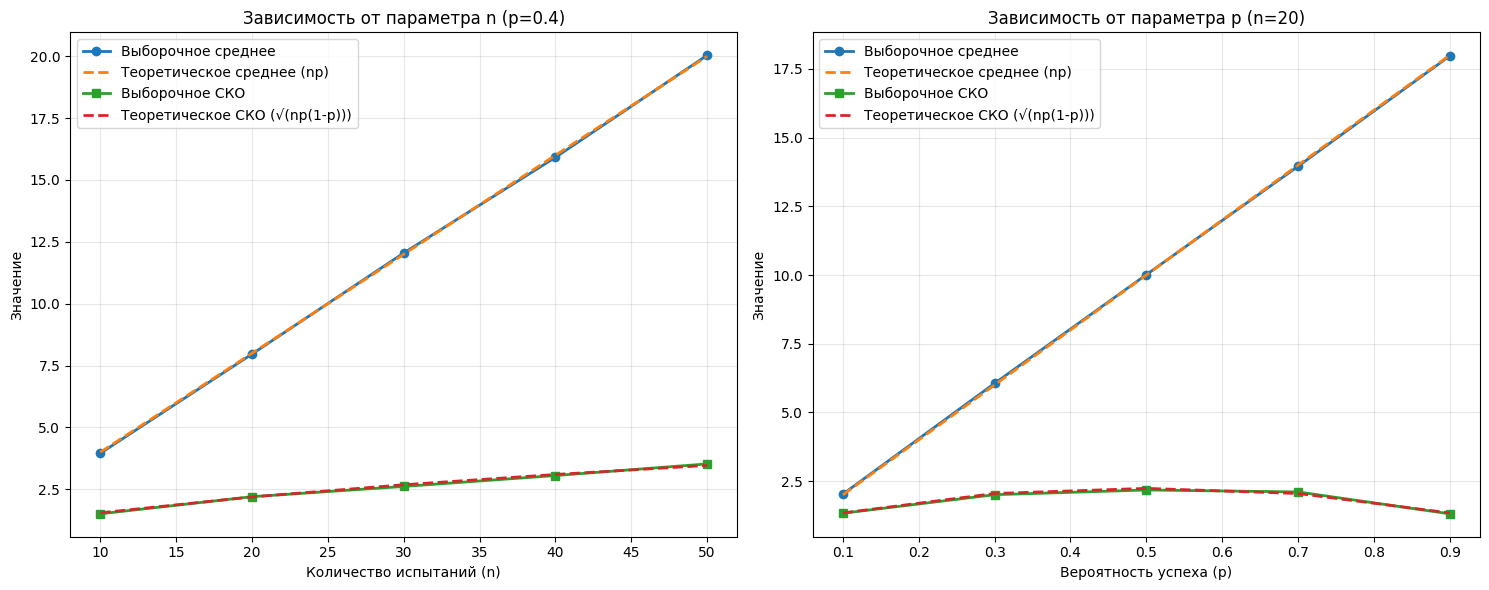

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
n_values = [10, 20, 30, 40, 50]
p_fixed = 0.4

means_n = []
stds_n = []
theoretical_means_n = []
theoretical_stds_n = []

for n_val in n_values:
    sample = np.random.binomial(n_val, p_fixed, 1000)
    means_n.append(np.mean(sample))
    stds_n.append(np.std(sample))
    theoretical_means_n.append(n_val * p_fixed)
    theoretical_stds_n.append(np.sqrt(n_val * p_fixed * (1 - p_fixed)))

ax1.plot(n_values, means_n, 'o-', label='Выборочное среднее', linewidth=2, markersize=6)
ax1.plot(n_values, theoretical_means_n, '--', label='Теоретическое среднее (np)', linewidth=2)
ax1.plot(n_values, stds_n, 's-', label='Выборочное СКО', linewidth=2, markersize=6)
ax1.plot(n_values, theoretical_stds_n, '--', label='Теоретическое СКО (√(np(1-p)))', linewidth=2)
ax1.set_xlabel('Количество испытаний (n)')
ax1.set_ylabel('Значение')
ax1.set_title(f'Зависимость от параметра n (p={p_fixed})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Зависимость от параметра p (при фиксированном n)
n_fixed = 20
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]

means_p = []
stds_p = []
theoretical_means_p = []
theoretical_stds_p = []

for p_val in p_values:
    sample = np.random.binomial(n_fixed, p_val, 1000)
    means_p.append(np.mean(sample))
    stds_p.append(np.std(sample))
    theoretical_means_p.append(n_fixed * p_val)
    theoretical_stds_p.append(np.sqrt(n_fixed * p_val * (1 - p_val)))

ax2.plot(p_values, means_p, 'o-', label='Выборочное среднее', linewidth=2, markersize=6)
ax2.plot(p_values, theoretical_means_p, '--', label='Теоретическое среднее (np)', linewidth=2)
ax2.plot(p_values, stds_p, 's-', label='Выборочное СКО', linewidth=2, markersize=6)
ax2.plot(p_values, theoretical_stds_p, '--', label='Теоретическое СКО (√(np(1-p)))', linewidth=2)
ax2.set_xlabel('Вероятность успеха (p)')
ax2.set_ylabel('Значение')
ax2.set_title(f'Зависимость от параметра p (n={n_fixed})')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

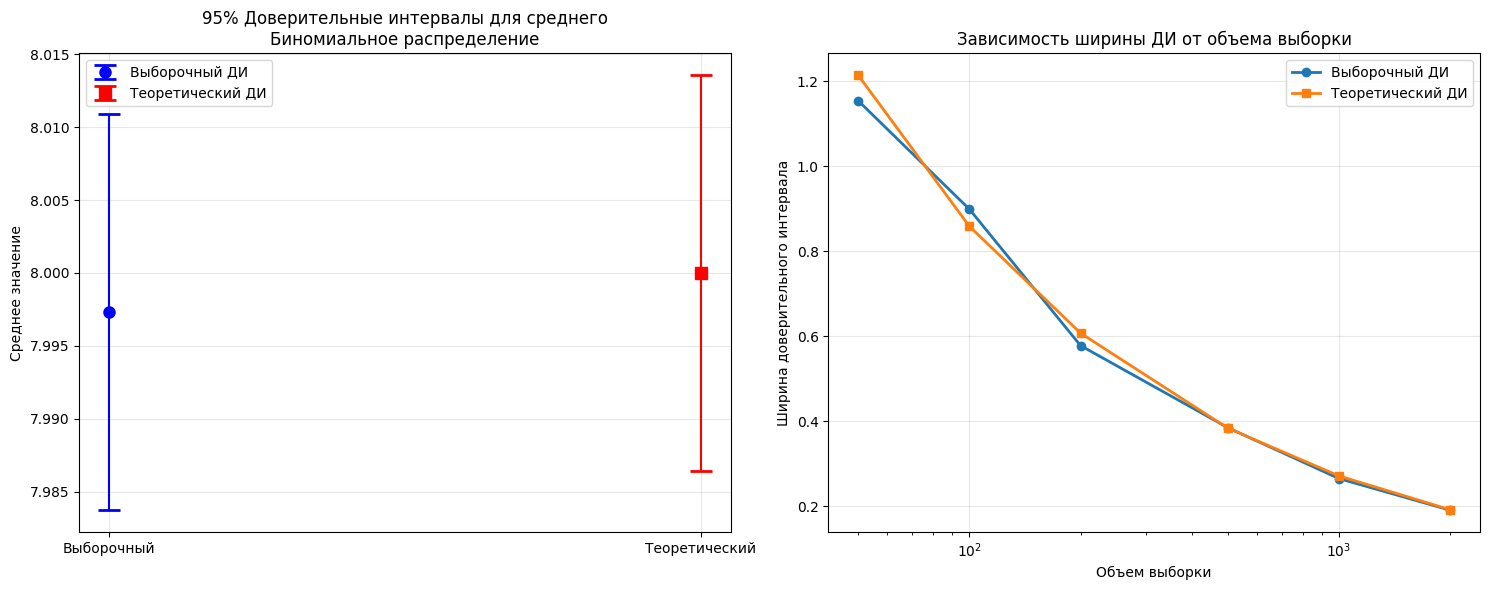

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [7.9837, 8.0109]
Теоретический ДИ: [7.9864, 8.0136]
Ширина выборочного ДИ: 0.0272
Ширина теоретического ДИ: 0.0272
Теоретическое среднее попадает в выборочный ДИ: ДА


In [104]:
# Выборочный доверительный интервал для среднего
t_value = ss.t.ppf(0.975, sample_size_binom - 1)
sample_margin = t_value * sample_std_binom / np.sqrt(sample_size_binom)
sample_ci = (sample_mean_binom - sample_margin, sample_mean_binom + sample_margin)

# Теоретический доверительный интервал
z_value = ss.norm.ppf(0.975)
theoretical_margin = z_value * theoretical_std_binom / np.sqrt(sample_size_binom)
theoretical_ci = (theoretical_mean_binom - theoretical_margin, theoretical_mean_binom + theoretical_margin)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
positions = [0, 1]
ax1.errorbar(0, sample_mean_binom, yerr=[[sample_mean_binom - sample_ci[0]], 
                                       [sample_ci[1] - sample_mean_binom]], 
            fmt='o', capsize=8, capthick=2, label='Выборочный ДИ', color='blue', markersize=8)
ax1.errorbar(1, theoretical_mean_binom, yerr=[[theoretical_mean_binom - theoretical_ci[0]], 
                                            [theoretical_ci[1] - theoretical_mean_binom]], 
            fmt='s', capsize=8, capthick=2, label='Теоретический ДИ', color='red', markersize=8)
ax1.set_xticks(positions)
ax1.set_xticklabels(['Выборочный', 'Теоретический'])
ax1.set_ylabel('Среднее значение')
ax1.set_title('95% Доверительные интервалы для среднего\nБиномиальное распределение')
ax1.legend()
ax1.grid(True, alpha=0.3)
sample_sizes_ci = [50, 100, 200, 500, 1000, 2000]
ci_widths_sample = []
ci_widths_theoretical = []

for size in sample_sizes_ci:
    # Выборочный ДИ
    sample_temp = np.random.binomial(n_binom, p_binom, size)
    mean_temp = np.mean(sample_temp)
    std_temp = np.std(sample_temp, ddof=1)
    t_val_temp = ss.t.ppf(0.975, size-1)
    margin_sample = t_val_temp * std_temp / np.sqrt(size)
    ci_widths_sample.append(2 * margin_sample)
    # Теоретический ДИ
    z_val = ss.norm.ppf(0.975)
    margin_theoretical = z_val * theoretical_std_binom / np.sqrt(size)
    ci_widths_theoretical.append(2 * margin_theoretical)

ax2.plot(sample_sizes_ci, ci_widths_sample, 'o-', label='Выборочный ДИ', linewidth=2, markersize=6)
ax2.plot(sample_sizes_ci, ci_widths_theoretical, 's-', label='Теоретический ДИ', linewidth=2, markersize=6)
ax2.set_xlabel('Объем выборки')
ax2.set_ylabel('Ширина доверительного интервала')
ax2.set_title('Зависимость ширины ДИ от объема выборки')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")
in_ci = sample_ci[0] <= theoretical_mean_binom <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")

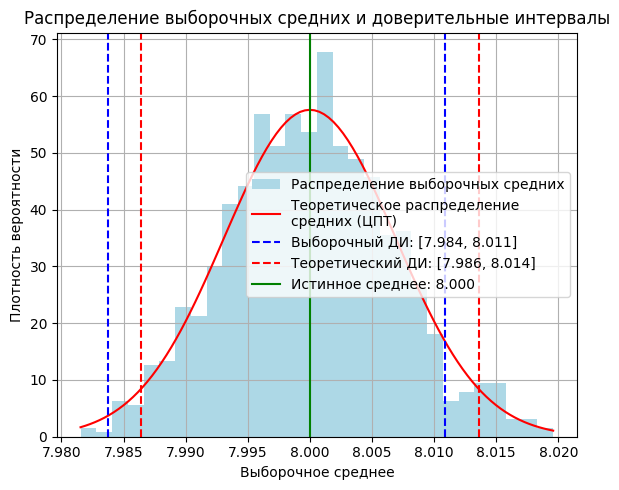

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [7.9837, 8.0109]
Теоретический ДИ: [7.9864, 8.0136]
Ширина выборочного ДИ: 0.0272
Ширина теоретического ДИ: 0.0272
Теоретическое среднее попадает в выборочный ДИ: ДА


In [105]:
# Выборочный доверительный интервал для среднего
t_value = ss.t.ppf(0.975, sample_size_binom - 1)
sample_margin = t_value * sample_std_binom / np.sqrt(sample_size_binom)
sample_ci = (sample_mean_binom - sample_margin, sample_mean_binom + sample_margin)

# Теоретический доверительный интервал
z_value = ss.norm.ppf(0.975)
theoretical_margin = z_value * theoretical_std_binom / np.sqrt(sample_size_binom)
theoretical_ci = (theoretical_mean_binom - theoretical_margin, theoretical_mean_binom + theoretical_margin)


# Генерируем много выборок для построения распределения средних
n_simulations = 1000
sample_means = []

for _ in range(n_simulations):
    sample_temp = np.random.binomial(n_binom, p_binom, sample_size_binom)
    sample_means.append(np.mean(sample_temp))

# для графичков :)
x_range = np.linspace(min(sample_means), max(sample_means), 100)
theoretical_std_means = theoretical_std_binom / np.sqrt(sample_size_binom)
theoretical_pdf_means = ss.norm.pdf(x_range, theoretical_mean_binom, theoretical_std_means)
plt.figure(figsize=(6, 5))
plt.hist(sample_means, bins=30, density=True, color='lightblue', label='Распределение выборочных средних')
plt.plot(x_range, theoretical_pdf_means, 'r-', label='Теоретическое распределение\nсредних (ЦПТ)')
plt.axvline(sample_ci[0], color='blue', linestyle='--', label=f'Выборочный ДИ: [{sample_ci[0]:.3f}, {sample_ci[1]:.3f}]')
plt.axvline(sample_ci[1], color='blue', linestyle='--')
plt.axvline(theoretical_ci[0], color='red', linestyle='--', label=f'Теоретический ДИ: [{theoretical_ci[0]:.3f}, {theoretical_ci[1]:.3f}]')
plt.axvline(theoretical_ci[1], color='red', linestyle='--')
plt.axvline(theoretical_mean_binom, color='green', label=f'Истинное среднее: {theoretical_mean_binom:.3f}')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность вероятности')
plt.title('Распределение выборочных средних и доверительные интервалы')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")
in_ci = sample_ci[0] <= theoretical_mean_binom <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")

# Poisson

In [106]:
lambda_poisson = 5 
sample_size_poisson = 100_000 
sample_poisson = np.random.poisson(lambda_poisson, sample_size_poisson)

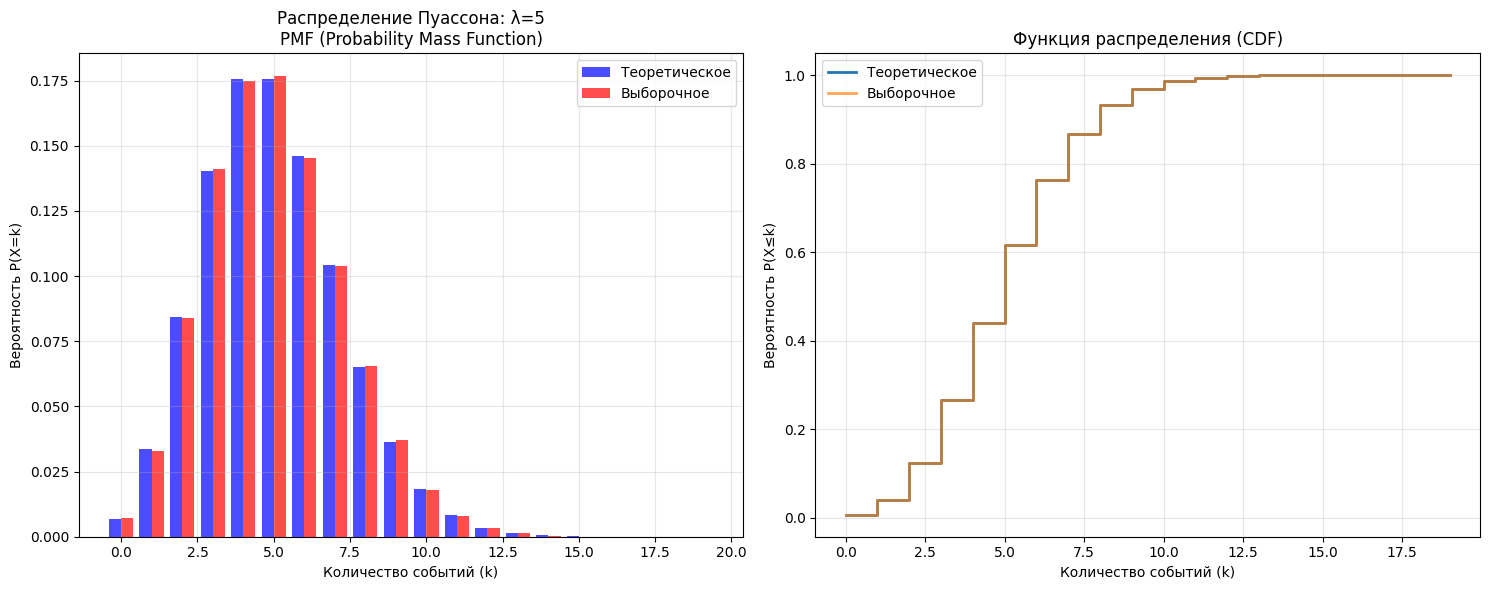

Параметр распределения: λ = 5
Объем выборки: 100000
Выборочное среднее: 5.0011
Теоретическое среднее (λ): 5.0000
Выборочное СКО: 2.2353
Теоретическое СКО (√λ): 2.2361


In [107]:
# Теоретическое распределение
x_poisson = np.arange(0, 20)  # значения от 0 до 19
theoretical_pmf_poisson = ss.poisson.pmf(x_poisson, lambda_poisson)
# Выборочное распределение
unique_poisson, counts_poisson = np.unique(sample_poisson, return_counts=True)
empirical_pmf_poisson = np.zeros_like(x_poisson, dtype=float)
for i, val in enumerate(x_poisson):
    if val in unique_poisson:
        idx = np.where(unique_poisson == val)[0][0]
        empirical_pmf_poisson[i] = counts_poisson[idx] / sample_size_poisson

# Создаем фигуру
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. PMF - теоретическое и выборочное распределение вероятностей
ax1.bar(x_poisson - 0.2, theoretical_pmf_poisson, width=0.4, alpha=0.7, 
        label='Теоретическое', color='blue')
ax1.bar(x_poisson + 0.2, empirical_pmf_poisson, width=0.4, alpha=0.7, 
        label='Выборочное', color='red')
ax1.set_xlabel('Количество событий (k)')
ax1.set_ylabel('Вероятность P(X=k)')
ax1.set_title(f'Распределение Пуассона: λ={lambda_poisson}\nPMF (Probability Mass Function)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. CDF - теоретическая и выборочная функция распределения
theoretical_cdf_poisson = ss.poisson.cdf(x_poisson, lambda_poisson)
empirical_cdf_poisson = np.cumsum(empirical_pmf_poisson)

ax2.step(x_poisson, theoretical_cdf_poisson, where='post', label='Теоретическое', linewidth=2)
ax2.step(x_poisson, empirical_cdf_poisson, where='post', label='Выборочное', linewidth=2, alpha=0.7)
ax2.set_xlabel('Количество событий (k)')
ax2.set_ylabel('Вероятность P(X≤k)')
ax2.set_title('Функция распределения (CDF)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

sample_mean_poisson = np.mean(sample_poisson)
sample_std_poisson = np.std(sample_poisson, ddof=1)
theoretical_mean_poisson = lambda_poisson
theoretical_std_poisson = np.sqrt(lambda_poisson)

print(f"Параметр распределения: λ = {lambda_poisson}")
print(f"Объем выборки: {sample_size_poisson}")
print(f"Выборочное среднее: {sample_mean_poisson:.4f}")
print(f"Теоретическое среднее (λ): {theoretical_mean_poisson:.4f}")
print(f"Выборочное СКО: {sample_std_poisson:.4f}")
print(f"Теоретическое СКО (√λ): {theoretical_std_poisson:.4f}")

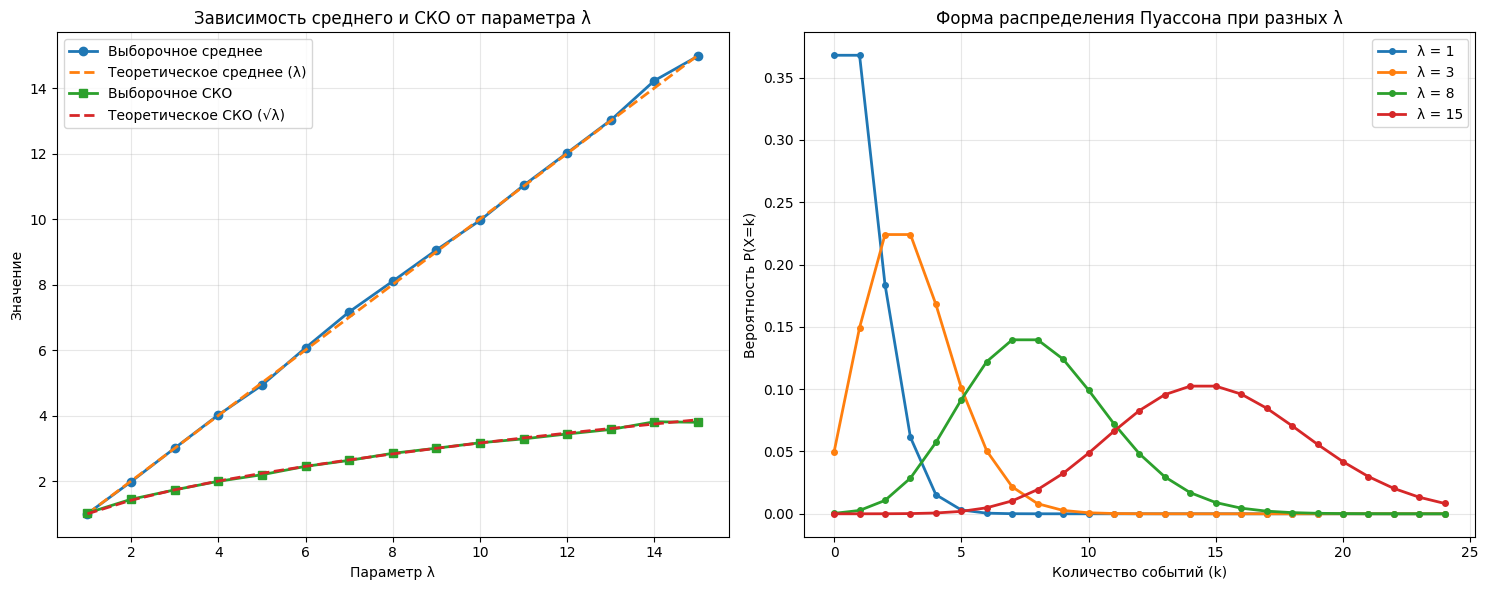

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. Зависимость среднего и СКО от параметра λ
lambda_values = np.arange(1, 16)  # λ от 1 до 15

means_lambda = []
stds_lambda = []
theoretical_means_lambda = []
theoretical_stds_lambda = []

for lam in lambda_values:
    sample = np.random.poisson(lam, 1000)
    means_lambda.append(np.mean(sample))
    stds_lambda.append(np.std(sample))
    theoretical_means_lambda.append(lam)
    theoretical_stds_lambda.append(np.sqrt(lam))

ax1.plot(lambda_values, means_lambda, 'o-', label='Выборочное среднее', linewidth=2, markersize=6)
ax1.plot(lambda_values, theoretical_means_lambda, '--', label='Теоретическое среднее (λ)', linewidth=2)
ax1.plot(lambda_values, stds_lambda, 's-', label='Выборочное СКО', linewidth=2, markersize=6)
ax1.plot(lambda_values, theoretical_stds_lambda, '--', label='Теоретическое СКО (√λ)', linewidth=2)
ax1.set_xlabel('Параметр λ')
ax1.set_ylabel('Значение')
ax1.set_title('Зависимость среднего и СКО от параметра λ')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Изменение формы распределения при разных λ
lambda_shapes = [1, 3, 8, 15]
x_range = np.arange(0, 25)

for i, lam in enumerate(lambda_shapes):
    pmf = ss.poisson.pmf(x_range, lam)
    ax2.plot(x_range, pmf, 'o-', linewidth=2, markersize=4, label=f'λ = {lam}')

ax2.set_xlabel('Количество событий (k)')
ax2.set_ylabel('Вероятность P(X=k)')
ax2.set_title('Форма распределения Пуассона при разных λ')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

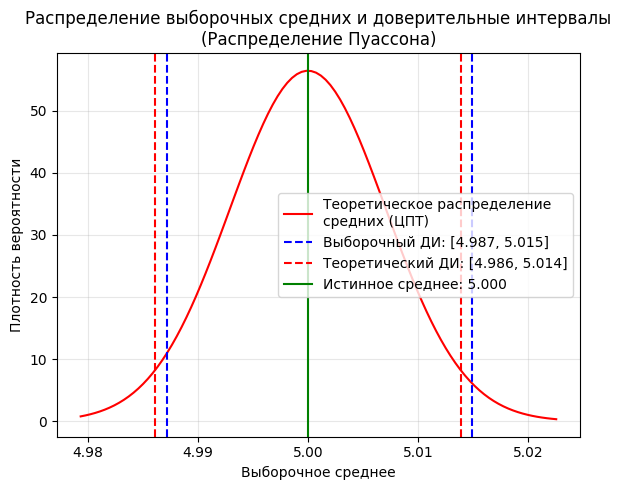

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [4.9872, 5.0149]
Теоретический ДИ: [4.9861, 5.0139]
Ширина выборочного ДИ: 0.0277
Ширина теоретического ДИ: 0.0277
Теоретическое среднее попадает в выборочный ДИ: ДА


In [109]:
t_value = ss.t.ppf(0.975, sample_size_poisson - 1)
sample_margin = t_value * sample_std_poisson / np.sqrt(sample_size_poisson)
sample_ci = (sample_mean_poisson - sample_margin, sample_mean_poisson + sample_margin)
# Теоретический доверительный интервал
z_value = ss.norm.ppf(0.975)
theoretical_margin = z_value * theoretical_std_poisson / np.sqrt(sample_size_poisson)
theoretical_ci = (theoretical_mean_poisson - theoretical_margin, theoretical_mean_poisson + theoretical_margin)

n_simulations = 1000
sample_means = []
for _ in range(n_simulations):
    sample_temp = np.random.poisson(lambda_poisson, sample_size_poisson)
    sample_means.append(np.mean(sample_temp))

# Теоретическое распределение средних (ЦПТ)
x_range = np.linspace(min(sample_means), max(sample_means), 100)
theoretical_std_means = theoretical_std_poisson / np.sqrt(sample_size_poisson)
theoretical_pdf_means = ss.norm.pdf(x_range, theoretical_mean_poisson, theoretical_std_means)

plt.figure(figsize=(6, 5))
plt.plot(x_range, theoretical_pdf_means, 'r-', label='Теоретическое распределение\nсредних (ЦПТ)')
# Доверительные интервалы
plt.axvline(sample_ci[0], color='blue', linestyle='--', label=f'Выборочный ДИ: [{sample_ci[0]:.3f}, {sample_ci[1]:.3f}]')
plt.axvline(sample_ci[1], color='blue', linestyle='--')
plt.axvline(theoretical_ci[0], color='red', linestyle='--', label=f'Теоретический ДИ: [{theoretical_ci[0]:.3f}, {theoretical_ci[1]:.3f}]')
plt.axvline(theoretical_ci[1], color='red', linestyle='--')
plt.axvline(theoretical_mean_poisson, color='green', label=f'Истинное среднее: {theoretical_mean_poisson:.3f}')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность вероятности')
plt.title('Распределение выборочных средних и доверительные интервалы\n(Распределение Пуассона)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")
in_ci = sample_ci[0] <= theoretical_mean_poisson <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")

# равномерное

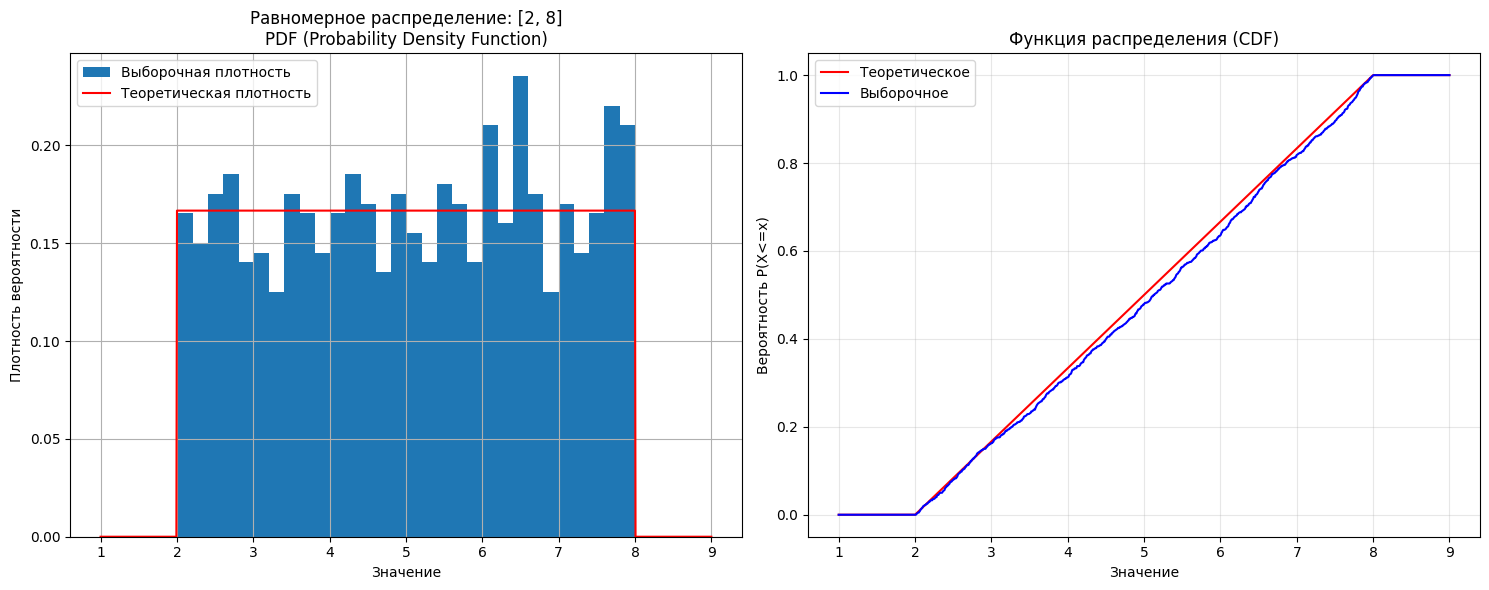

Параметры распределения: a = 2, b = 8
Объем выборки: 1000
Выборочное среднее: 5.0912
Теоретическое среднее ((a+b)/2): 5.0000
Выборочное СКО: 1.7515
Теоретическое СКО ((b-a)/√12): 1.7321


In [110]:
a = 2  
b = 8  
sample_size_uniform = 1000 
sample_uniform = np.random.uniform(a, b, sample_size_uniform)
# Теоретическое распределение
x_uniform = np.linspace(a-1, b+1, 1000)
theoretical_pdf_uniform = ss.uniform.pdf(x_uniform, a, b-a)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. PDF - теоретическая и выборочная плотность вероятности
ax1.hist(sample_uniform, bins=30, density=True, label='Выборочная плотность')
ax1.plot(x_uniform, theoretical_pdf_uniform, 'r-', label='Теоретическая плотность')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title(f'Равномерное распределение: [{a}, {b}]\nPDF (Probability Density Function)')
ax1.legend()
ax1.grid()

# 2. CDF - теоретическая и выборочная функция распределения
theoretical_cdf_uniform = ss.uniform.cdf(x_uniform, a, b-a)
empirical_cdf_uniform = np.array([np.mean(sample_uniform <= x) for x in x_uniform])
ax2.plot(x_uniform, theoretical_cdf_uniform, 'r-', label='Теоретическое')
ax2.plot(x_uniform, empirical_cdf_uniform, 'b-', label='Выборочное')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Вероятность P(X<=x)')
ax2.set_title('Функция распределения (CDF)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

sample_mean_uniform = np.mean(sample_uniform)
sample_std_uniform = np.std(sample_uniform, ddof=1)
theoretical_mean_uniform = (a + b) / 2
theoretical_std_uniform = (b - a) / np.sqrt(12)
print(f"Параметры распределения: a = {a}, b = {b}")
print(f"Объем выборки: {sample_size_uniform}")
print(f"Выборочное среднее: {sample_mean_uniform:.4f}")
print(f"Теоретическое среднее ((a+b)/2): {theoretical_mean_uniform:.4f}")
print(f"Выборочное СКО: {sample_std_uniform:.4f}")
print(f"Теоретическое СКО ((b-a)/√12): {theoretical_std_uniform:.4f}")

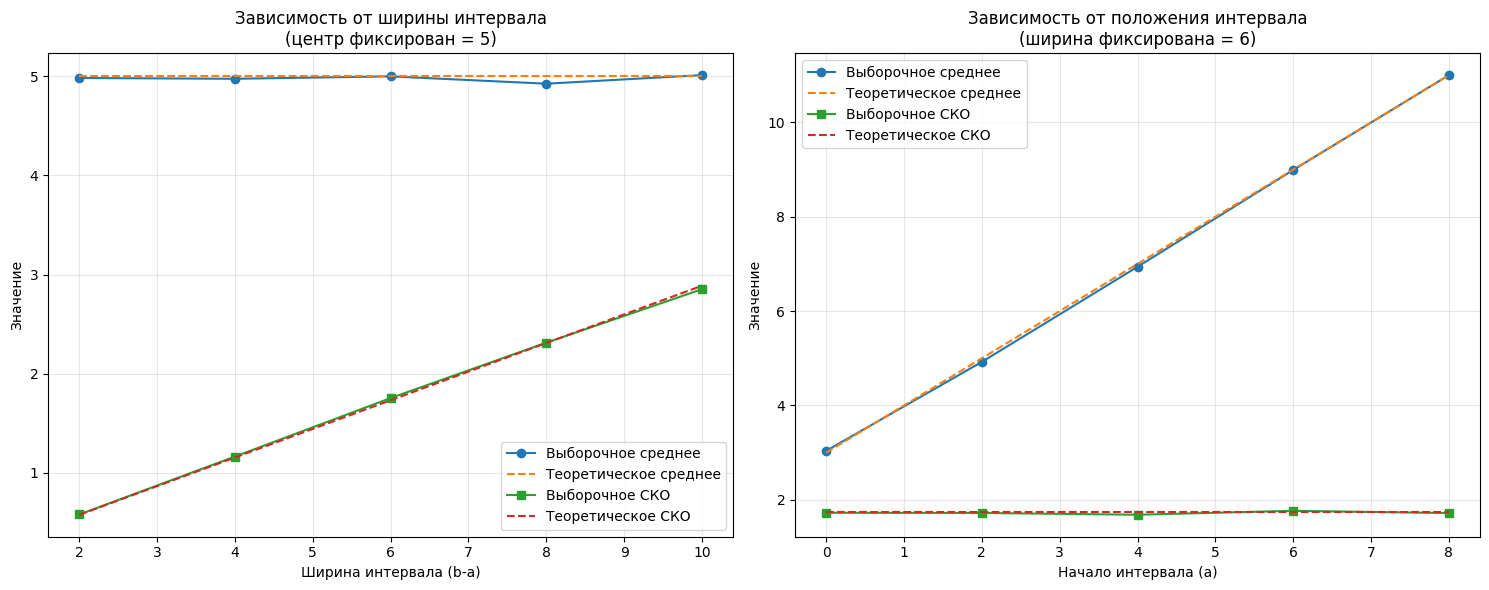

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. Зависимость от ширины интервала (b-a) при фиксированном центре
interval_widths = [2, 4, 6, 8, 10]
center = 5

means_width = []
stds_width = []
theoretical_means_width = []
theoretical_stds_width = []

for width in interval_widths:
    a_temp = center - width/2
    b_temp = center + width/2
    sample = np.random.uniform(a_temp, b_temp, 1000)
    means_width.append(np.mean(sample))
    stds_width.append(np.std(sample))
    theoretical_means_width.append((a_temp + b_temp)/2)
    theoretical_stds_width.append((b_temp - a_temp)/np.sqrt(12))

ax1.plot(interval_widths, means_width, 'o-', label='Выборочное среднее')
ax1.plot(interval_widths, theoretical_means_width, '--', label='Теоретическое среднее')
ax1.plot(interval_widths, stds_width, 's-', label='Выборочное СКО')
ax1.plot(interval_widths, theoretical_stds_width, '--', label='Теоретическое СКО')
ax1.set_xlabel('Ширина интервала (b-a)')
ax1.set_ylabel('Значение')
ax1.set_title('Зависимость от ширины интервала\n(центр фиксирован = 5)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Зависимость от положения интервала при фиксированной ширине
fixed_width = 6
positions = [0, 2, 4, 6, 8]

means_pos = []
stds_pos = []
theoretical_means_pos = []
theoretical_stds_pos = []

for pos in positions:
    a_temp = pos
    b_temp = pos + fixed_width
    sample = np.random.uniform(a_temp, b_temp, 1000)
    means_pos.append(np.mean(sample))
    stds_pos.append(np.std(sample))
    theoretical_means_pos.append((a_temp + b_temp)/2)
    theoretical_stds_pos.append(fixed_width/np.sqrt(12))

ax2.plot(positions, means_pos, 'o-', label='Выборочное среднее')
ax2.plot(positions, theoretical_means_pos, '--', label='Теоретическое среднее')
ax2.plot(positions, stds_pos, 's-', label='Выборочное СКО')
ax2.plot(positions, theoretical_stds_pos, '--', label='Теоретическое СКО')
ax2.set_xlabel('Начало интервала (a)')
ax2.set_ylabel('Значение')
ax2.set_title('Зависимость от положения интервала\n(ширина фиксирована = 6)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

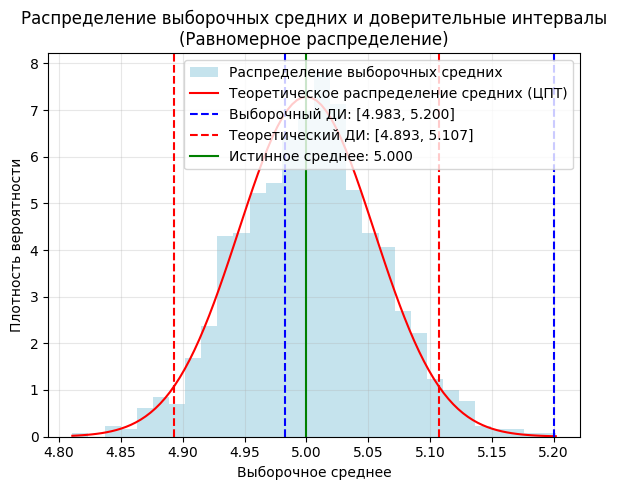

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [4.9825, 5.1999]
Теоретический ДИ: [4.8926, 5.1074]
Ширина выборочного ДИ: 0.2174
Ширина теоретического ДИ: 0.2147
Теоретическое среднее попадает в выборочный ДИ: ДА


In [112]:
# Выборочный доверительный интервал для среднего
t_value = ss.t.ppf(0.975, sample_size_uniform - 1)
sample_margin = t_value * sample_std_uniform / np.sqrt(sample_size_uniform)
sample_ci = (sample_mean_uniform - sample_margin, sample_mean_uniform + sample_margin)

# Теоретический доверительный интервал
z_value = ss.norm.ppf(0.975)
theoretical_margin = z_value * theoretical_std_uniform / np.sqrt(sample_size_uniform)
theoretical_ci = (theoretical_mean_uniform - theoretical_margin, theoretical_mean_uniform + theoretical_margin)

plt.figure(figsize=(6, 5))
n_simulations = 1000
sample_means = []

for _ in range(n_simulations):
    sample_temp = np.random.uniform(a, b, sample_size_uniform)
    sample_means.append(np.mean(sample_temp))

plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='lightblue', label='Распределение выборочных средних')
x_range = np.linspace(min(sample_means), max(sample_means), 100)
theoretical_std_means = theoretical_std_uniform / np.sqrt(sample_size_uniform)
theoretical_pdf_means = ss.norm.pdf(x_range, theoretical_mean_uniform, theoretical_std_means)
plt.plot(x_range, theoretical_pdf_means, 'r-', label='Теоретическое распределение средних (ЦПТ)')

# Доверительные интервалы
plt.axvline(sample_ci[0], color='blue', linestyle='--', 
           label=f'Выборочный ДИ: [{sample_ci[0]:.3f}, {sample_ci[1]:.3f}]')
plt.axvline(sample_ci[1], color='blue', linestyle='--')
plt.axvline(theoretical_ci[0], color='red', linestyle='--', 
           label=f'Теоретический ДИ: [{theoretical_ci[0]:.3f}, {theoretical_ci[1]:.3f}]')
plt.axvline(theoretical_ci[1], color='red', linestyle='--')

# Истинное среднее
plt.axvline(theoretical_mean_uniform, color='green', 
           label=f'Истинное среднее: {theoretical_mean_uniform:.3f}')

plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность вероятности')
plt.title('Распределение выборочных средних и доверительные интервалы\n(Равномерное распределение)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")
in_ci = sample_ci[0] <= theoretical_mean_uniform <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")

# нормальное

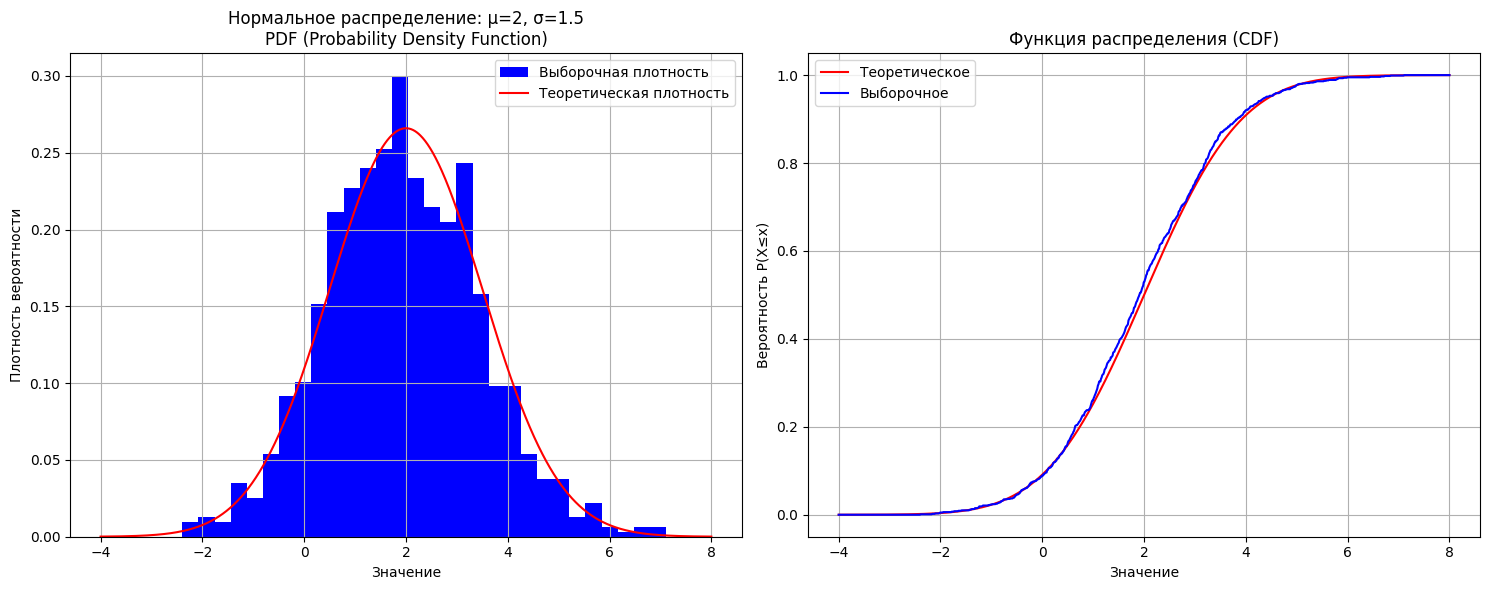

Параметры распределения: μ = 2, σ = 1.5
Объем выборки: 1000
Выборочное среднее: 1.9411
Теоретическое среднее (μ): 2.0000
Выборочное СКО: 1.4966
Теоретическое СКО (σ): 1.5000


In [113]:
mu = 2      
sigma = 1.5 
sample_size_normal = 1000 
sample_normal = np.random.normal(mu, sigma, sample_size_normal)
# Теоретическое распределение
x_normal = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
theoretical_pdf_normal = ss.norm.pdf(x_normal, mu, sigma)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. PDF - теоретическая и выборочная плотность вероятности
ax1.hist(sample_normal, bins=30, density=True, color='blue', label='Выборочная плотность')
ax1.plot(x_normal, theoretical_pdf_normal, 'red', label='Теоретическая плотность')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title(f'Нормальное распределение: μ={mu}, σ={sigma}\nPDF (Probability Density Function)')
ax1.legend()
ax1.grid(True)
# 2. CDF - теоретическая и выборочная функция распределения
theoretical_cdf_normal = ss.norm.cdf(x_normal, mu, sigma)
empirical_cdf_normal = np.array([np.mean(sample_normal <= x) for x in x_normal])
ax2.plot(x_normal, theoretical_cdf_normal, 'red', label='Теоретическое')
ax2.plot(x_normal, empirical_cdf_normal, 'blue', label='Выборочное')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Вероятность P(X≤x)')
ax2.set_title('Функция распределения (CDF)')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

sample_mean_normal = np.mean(sample_normal)
sample_std_normal = np.std(sample_normal, ddof=1)
theoretical_mean_normal = mu
theoretical_std_normal = sigma

print(f"Параметры распределения: μ = {mu}, σ = {sigma}")
print(f"Объем выборки: {sample_size_normal}")
print(f"Выборочное среднее: {sample_mean_normal:.4f}")
print(f"Теоретическое среднее (μ): {theoretical_mean_normal:.4f}")
print(f"Выборочное СКО: {sample_std_normal:.4f}")
print(f"Теоретическое СКО (σ): {theoretical_std_normal:.4f}")

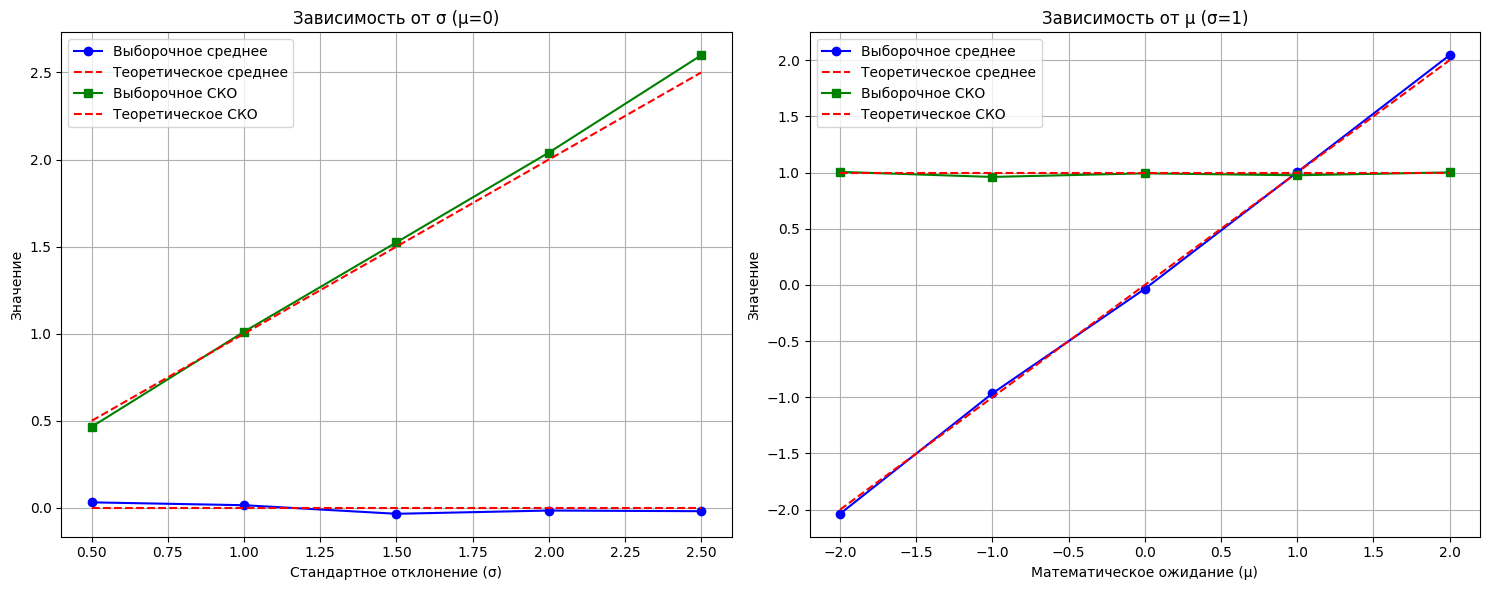

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. Зависимость от параметра σ (при фиксированном μ)
mu_fixed = 0
sigma_values = [0.5, 1.0, 1.5, 2.0, 2.5]
means_sigma = []
stds_sigma = []
theoretical_means_sigma = []
theoretical_stds_sigma = []
for sig in sigma_values:
    sample = np.random.normal(mu_fixed, sig, 1000)
    means_sigma.append(np.mean(sample))
    stds_sigma.append(np.std(sample))
    theoretical_means_sigma.append(mu_fixed)
    theoretical_stds_sigma.append(sig)

ax1.plot(sigma_values, means_sigma, 'bo-', label='Выборочное среднее')
ax1.plot(sigma_values, theoretical_means_sigma, 'r--', label='Теоретическое среднее')
ax1.plot(sigma_values, stds_sigma, 'gs-', label='Выборочное СКО')
ax1.plot(sigma_values, theoretical_stds_sigma, 'r--', label='Теоретическое СКО')
ax1.set_xlabel('Стандартное отклонение (σ)')
ax1.set_ylabel('Значение')
ax1.set_title('Зависимость от σ (μ=0)')
ax1.legend()
ax1.grid(True)

# 2. Зависимость от параметра μ (при фиксированном σ)
sigma_fixed = 1
mu_values = [-2, -1, 0, 1, 2]

means_mu = []
stds_mu = []
theoretical_means_mu = []
theoretical_stds_mu = []

for m in mu_values:
    sample = np.random.normal(m, sigma_fixed, 1000)
    means_mu.append(np.mean(sample))
    stds_mu.append(np.std(sample))
    theoretical_means_mu.append(m)
    theoretical_stds_mu.append(sigma_fixed)

ax2.plot(mu_values, means_mu, 'bo-', label='Выборочное среднее')
ax2.plot(mu_values, theoretical_means_mu, 'r--', label='Теоретическое среднее')
ax2.plot(mu_values, stds_mu, 'gs-', label='Выборочное СКО')
ax2.plot(mu_values, theoretical_stds_mu, 'r--', label='Теоретическое СКО')
ax2.set_xlabel('Математическое ожидание (μ)')
ax2.set_ylabel('Значение')
ax2.set_title('Зависимость от μ (σ=1)')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

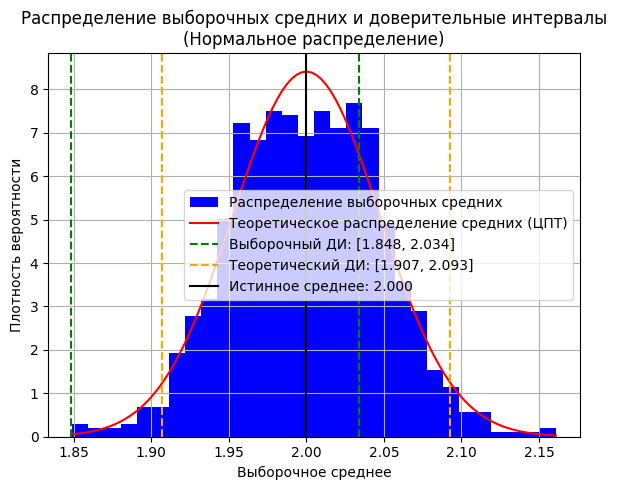

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [1.8482, 2.0340]
Теоретический ДИ: [1.9070, 2.0930]
Ширина выборочного ДИ: 0.1857
Ширина теоретического ДИ: 0.1859
Теоретическое среднее попадает в выборочный ДИ: ДА


In [115]:
t_value = ss.t.ppf(0.975, sample_size_normal - 1)
sample_margin = t_value * sample_std_normal / np.sqrt(sample_size_normal)
sample_ci = (sample_mean_normal - sample_margin, sample_mean_normal + sample_margin)
# Теоретический доверительный интервал
z_value = ss.norm.ppf(0.975)
theoretical_margin = z_value * theoretical_std_normal / np.sqrt(sample_size_normal)
theoretical_ci = (theoretical_mean_normal - theoretical_margin, theoretical_mean_normal + theoretical_margin)

plt.figure(figsize=(6, 5))
n_simulations = 1000
sample_means = []

for _ in range(n_simulations):
    sample_temp = np.random.normal(mu, sigma, sample_size_normal)
    sample_means.append(np.mean(sample_temp))

plt.hist(sample_means, bins=30, density=True, color='blue', label='Распределение выборочных средних')

# Теоретическое распределение средних (ЦПТ)
x_range = np.linspace(min(sample_means), max(sample_means), 100)
theoretical_std_means = theoretical_std_normal / np.sqrt(sample_size_normal)
theoretical_pdf_means = ss.norm.pdf(x_range, theoretical_mean_normal, theoretical_std_means)
plt.plot(x_range, theoretical_pdf_means, 'red', label='Теоретическое распределение средних (ЦПТ)')
# Доверительные интервалы
plt.axvline(sample_ci[0], color='green', linestyle='--', label=f'Выборочный ДИ: [{sample_ci[0]:.3f}, {sample_ci[1]:.3f}]')
plt.axvline(sample_ci[1], color='green', linestyle='--')
plt.axvline(theoretical_ci[0], color='orange', linestyle='--', label=f'Теоретический ДИ: [{theoretical_ci[0]:.3f}, {theoretical_ci[1]:.3f}]')
plt.axvline(theoretical_ci[1], color='orange', linestyle='--')
# Истинное среднее
plt.axvline(theoretical_mean_normal, color='black', label=f'Истинное среднее: {theoretical_mean_normal:.3f}')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность вероятности')
plt.title('Распределение выборочных средних и доверительные интервалы\n(Нормальное распределение)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")
in_ci = sample_ci[0] <= theoretical_mean_normal <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")

# Стьютента

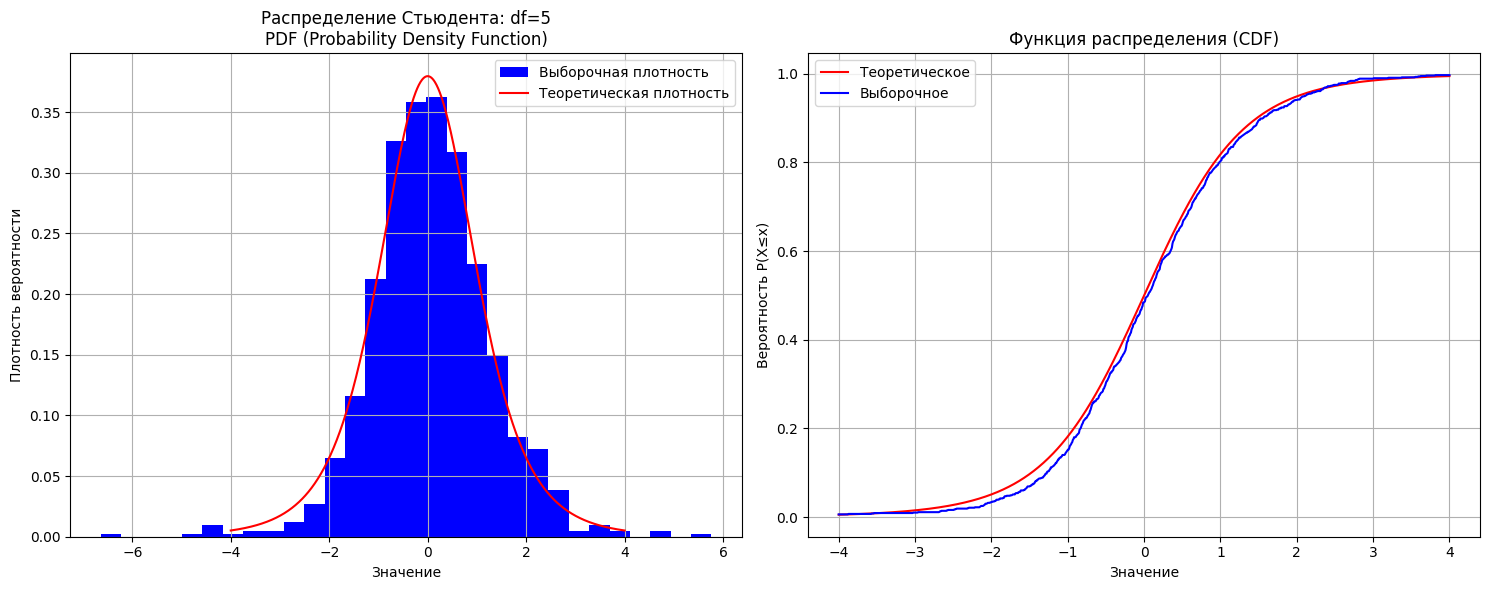

Параметры распределения: df = 5
Объем выборки: 1000
Выборочное среднее: 0.0821
Теоретическое среднее: 0.0000
Выборочное СКО: 1.2120
Теоретическое СКО: 1.2910


In [116]:
df = 5  
sample_size_t = 1000 
sample_t = np.random.standard_t(df, sample_size_t)

# Теоретическое распределение
x_t = np.linspace(-4, 4, 1000)
theoretical_pdf_t = ss.t.pdf(x_t, df)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. PDF - теоретическая и выборочная плотность вероятности
ax1.hist(sample_t, bins=30, density=True, color='blue', label='Выборочная плотность')
ax1.plot(x_t, theoretical_pdf_t, 'red', label='Теоретическая плотность')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title(f'Распределение Стьюдента: df={df}\nPDF (Probability Density Function)')
ax1.legend()
ax1.grid()
# 2. CDF - теоретическая и выборочная функция распределения
theoretical_cdf_t = ss.t.cdf(x_t, df)
empirical_cdf_t = np.array([np.mean(sample_t <= x) for x in x_t])
ax2.plot(x_t, theoretical_cdf_t, 'red', label='Теоретическое')
ax2.plot(x_t, empirical_cdf_t, 'blue', label='Выборочное')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Вероятность P(X≤x)')
ax2.set_title('Функция распределения (CDF)')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()

sample_mean_t = np.mean(sample_t)
sample_std_t = np.std(sample_t, ddof=1)
theoretical_mean_t = 0 if df > 1 else np.nan
theoretical_std_t = np.sqrt(df/(df-2)) if df > 2 else np.inf

print(f"Параметры распределения: df = {df}")
print(f"Объем выборки: {sample_size_t}")
print(f"Выборочное среднее: {sample_mean_t:.4f}")
print(f"Теоретическое среднее: {theoretical_mean_t:.4f}")
print(f"Выборочное СКО: {sample_std_t:.4f}")
print(f"Теоретическое СКО: {theoretical_std_t:.4f}")

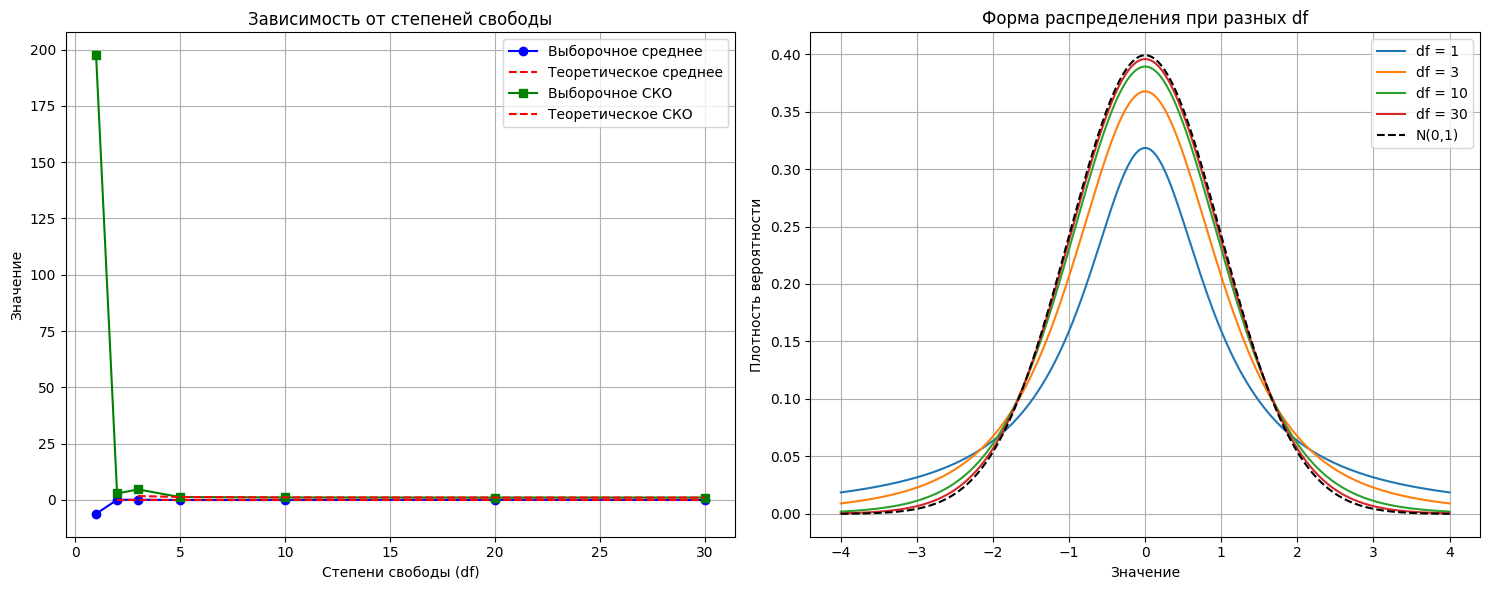

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
df_values = [1, 2, 3, 5, 10, 20, 30]
means_df = []
stds_df = []
theoretical_means_df = []
theoretical_stds_df = []

for df_val in df_values:
    sample = np.random.standard_t(df_val, 1000)
    means_df.append(np.mean(sample))
    stds_df.append(np.std(sample))
    theoretical_means_df.append(0 if df_val > 1 else np.nan)
    theoretical_stds_df.append(np.sqrt(df_val/(df_val-2)) if df_val > 2 else np.inf)

ax1.plot(df_values, means_df, 'bo-', label='Выборочное среднее')
ax1.plot(df_values, theoretical_means_df, 'r--', label='Теоретическое среднее')
ax1.plot(df_values, stds_df, 'gs-', label='Выборочное СКО')
ax1.plot(df_values, theoretical_stds_df, 'r--', label='Теоретическое СКО')
ax1.set_xlabel('Степени свободы (df)')
ax1.set_ylabel('Значение')
ax1.set_title('Зависимость от степеней свободы')
ax1.legend()
ax1.grid(True)

df_shapes = [1, 3, 10, 30]
x_range = np.linspace(-4, 4, 1000)

for df_val in df_shapes:
    pdf = ss.t.pdf(x_range, df_val)
    ax2.plot(x_range, pdf, label=f'df = {df_val}')
normal_pdf = ss.norm.pdf(x_range, 0, 1)
ax2.plot(x_range, normal_pdf, 'black', linestyle='--', label='N(0,1)')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('Форма распределения при разных df')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

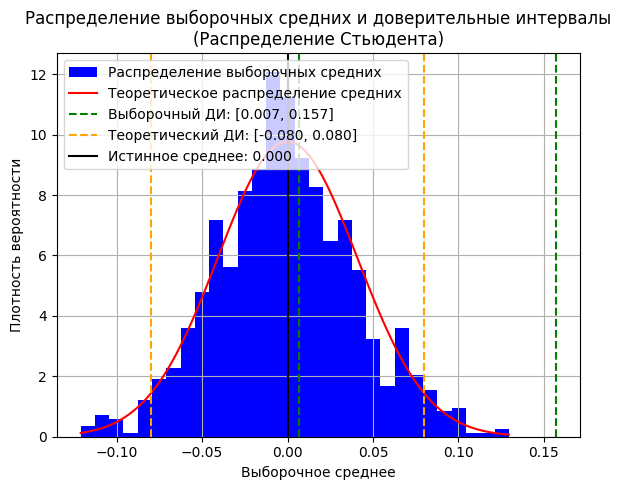

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [0.0069, 0.1573]
Теоретический ДИ: [-0.0801, 0.0801]
Ширина теоретического ДИ: 0.1602
Ширина выборочного ДИ: 0.1504
Теоретическое среднее попадает в выборочный ДИ: НЕТ


In [118]:
sample_mean_t = np.mean(sample_t)
sample_std_t = np.std(sample_t, ddof=1)
theoretical_mean_t = 0
t_value = ss.t.ppf(0.975, sample_size_t - 1)
sample_margin = t_value * sample_std_t / np.sqrt(sample_size_t)
sample_ci = (sample_mean_t - sample_margin, sample_mean_t + sample_margin)

if df > 2:
    theoretical_std_t = np.sqrt(df/(df-2))
    theoretical_margin = t_value * theoretical_std_t / np.sqrt(sample_size_t)
    theoretical_ci = (theoretical_mean_t - theoretical_margin, theoretical_mean_t + theoretical_margin)
else:
    theoretical_ci = (np.nan, np.nan)

plt.figure(figsize=(6, 5))
n_simulations = 1000
sample_means = []

for _ in range(n_simulations):
    sample_temp = np.random.standard_t(df, sample_size_t)
    sample_means.append(np.mean(sample_temp))

plt.hist(sample_means, bins=30, density=True, color='blue', label='Распределение выборочных средних')

# Теоретическое распределение средних (ЦПТ)
x_range = np.linspace(min(sample_means), max(sample_means), 100)
if df > 2:
    theoretical_std_means = np.sqrt(df/(df-2)) / np.sqrt(sample_size_t)
    theoretical_pdf_means = ss.norm.pdf(x_range, theoretical_mean_t, theoretical_std_means)
    plt.plot(x_range, theoretical_pdf_means, 'red', label='Теоретическое распределение средних')
# Доверительные интервалы
plt.axvline(sample_ci[0], color='green', linestyle='--', label=f'Выборочный ДИ: [{sample_ci[0]:.3f}, {sample_ci[1]:.3f}]')
plt.axvline(sample_ci[1], color='green', linestyle='--')
if df > 2:
    plt.axvline(theoretical_ci[0], color='orange', linestyle='--', label=f'Теоретический ДИ: [{theoretical_ci[0]:.3f}, {theoretical_ci[1]:.3f}]')
    plt.axvline(theoretical_ci[1], color='orange', linestyle='--')
# Истинное среднее
plt.axvline(theoretical_mean_t, color='black', label=f'Истинное среднее: {theoretical_mean_t:.3f}')

plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность вероятности')
plt.title('Распределение выборочных средних и доверительные интервалы\n(Распределение Стьюдента)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
if df > 2:
    print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
    print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")
else:
    print("Теоретический ДИ: не определен (df ≤ 2)")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
in_ci = sample_ci[0] <= theoretical_mean_t <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")


# хи квадрат

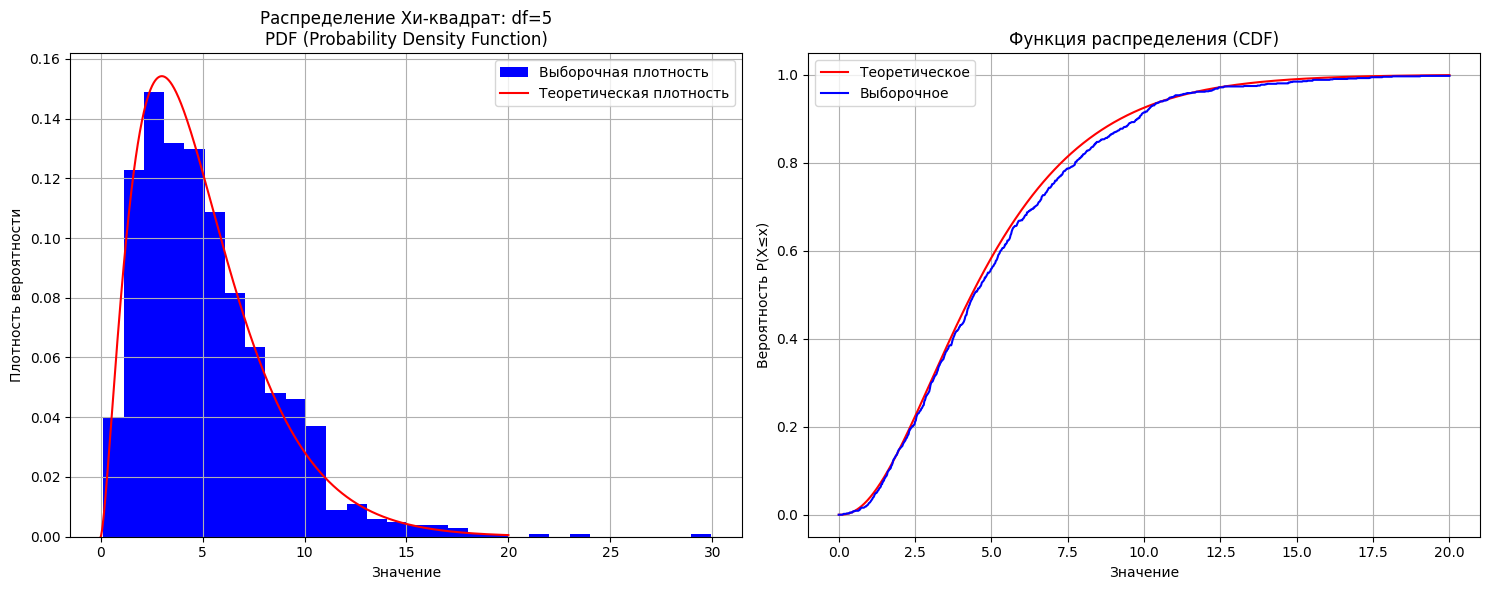

Параметры распределения: df = 5
Объем выборки: 1000
Выборочное среднее: 5.2163
Теоретическое среднее (df): 5.0000
Выборочное СКО: 3.3974
Теоретическое СКО (√(2df)): 3.1623


In [119]:
df_chi2 = 5  
sample_size_chi2 = 1000  
sample_chi2 = np.random.chisquare(df_chi2, sample_size_chi2)
x_chi2 = np.linspace(0, 20, 1000)
theoretical_pdf_chi2 = ss.chi2.pdf(x_chi2, df_chi2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. PDF - теоретическая и выборочная плотность вероятности
ax1.hist(sample_chi2, bins=30, density=True, color='blue', label='Выборочная плотность')
ax1.plot(x_chi2, theoretical_pdf_chi2, 'red', label='Теоретическая плотность')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title(f'Распределение Хи-квадрат: df={df_chi2}\nPDF (Probability Density Function)')
ax1.legend()
ax1.grid()

# 2. CDF - теоретическая и выборочная функция распределения
theoretical_cdf_chi2 = ss.chi2.cdf(x_chi2, df_chi2)
empirical_cdf_chi2 = np.array([np.mean(sample_chi2 <= x) for x in x_chi2])

ax2.plot(x_chi2, theoretical_cdf_chi2, 'red', label='Теоретическое')
ax2.plot(x_chi2, empirical_cdf_chi2, 'blue', label='Выборочное')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Вероятность P(X≤x)')
ax2.set_title('Функция распределения (CDF)')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()

sample_mean_chi2 = np.mean(sample_chi2)
sample_std_chi2 = np.std(sample_chi2, ddof=1)
theoretical_mean_chi2 = df_chi2
theoretical_std_chi2 = np.sqrt(2 * df_chi2)

print(f"Параметры распределения: df = {df_chi2}")
print(f"Объем выборки: {sample_size_chi2}")
print(f"Выборочное среднее: {sample_mean_chi2:.4f}")
print(f"Теоретическое среднее (df): {theoretical_mean_chi2:.4f}")
print(f"Выборочное СКО: {sample_std_chi2:.4f}")
print(f"Теоретическое СКО (√(2df)): {theoretical_std_chi2:.4f}")

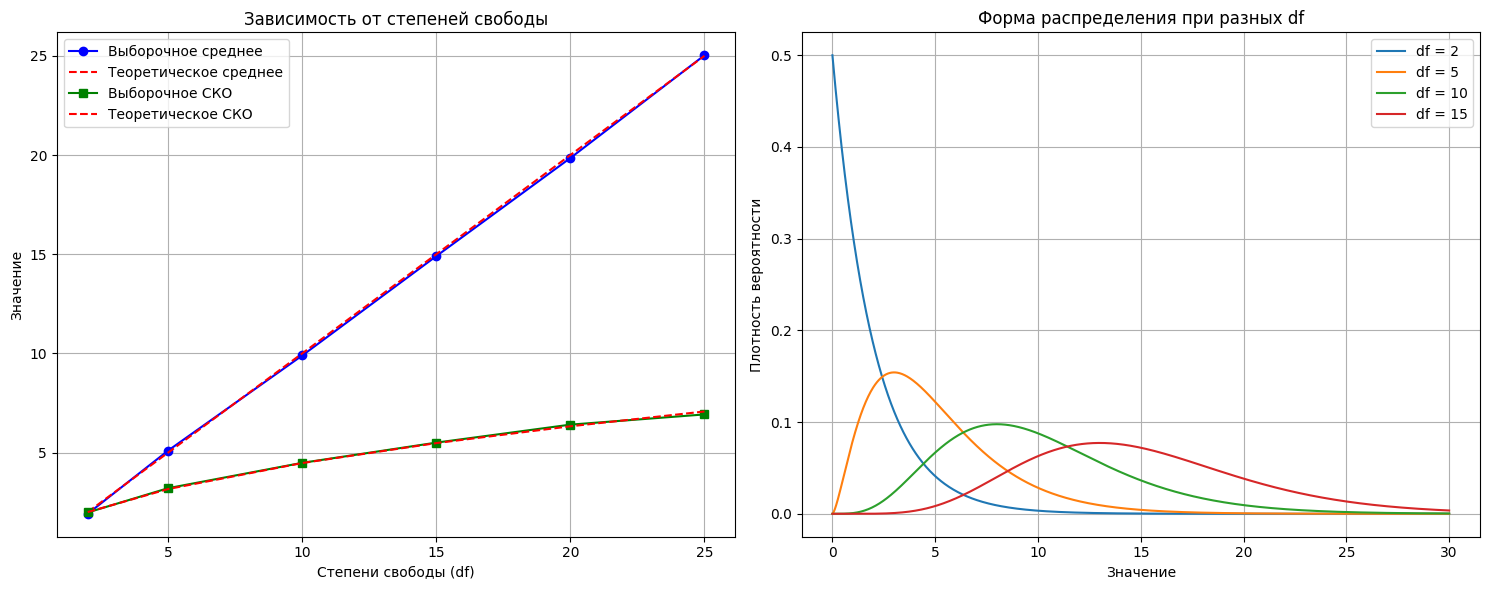

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. Зависимость среднего и СКО от степеней свободы
df_values = [2, 5, 10, 15, 20, 25]
means_df = []
stds_df = []
theoretical_means_df = []
theoretical_stds_df = []

for df_val in df_values:
    sample = np.random.chisquare(df_val, 1000)
    means_df.append(np.mean(sample))
    stds_df.append(np.std(sample))
    theoretical_means_df.append(df_val)
    theoretical_stds_df.append(np.sqrt(2 * df_val))

ax1.plot(df_values, means_df, 'bo-', label='Выборочное среднее')
ax1.plot(df_values, theoretical_means_df, 'r--', label='Теоретическое среднее')
ax1.plot(df_values, stds_df, 'gs-', label='Выборочное СКО')
ax1.plot(df_values, theoretical_stds_df, 'r--', label='Теоретическое СКО')
ax1.set_xlabel('Степени свободы (df)')
ax1.set_ylabel('Значение')
ax1.set_title('Зависимость от степеней свободы')
ax1.legend()
ax1.grid(True)

# 2. Изменение формы распределения при разных df
df_shapes = [2, 5, 10, 15]
x_range = np.linspace(0, 30, 1000)

for df_val in df_shapes:
    pdf = ss.chi2.pdf(x_range, df_val)
    ax2.plot(x_range, pdf, label=f'df = {df_val}')

ax2.set_xlabel('Значение')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('Форма распределения при разных df')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

прикольно!

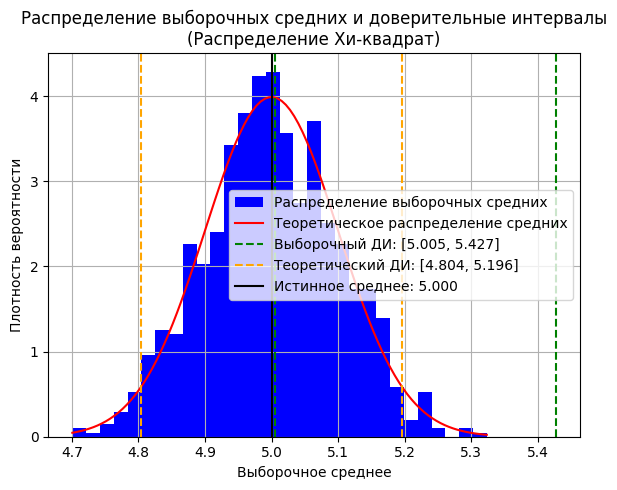

95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
Выборочный ДИ: [5.0054, 5.4271]
Теоретический ДИ: [4.8040, 5.1960]
Ширина выборочного ДИ: 0.4216
Ширина теоретического ДИ: 0.3920
Теоретическое среднее попадает в выборочный ДИ: НЕТ


In [121]:
sample_mean_chi2 = np.mean(sample_chi2)
sample_std_chi2 = np.std(sample_chi2, ddof=1)
theoretical_mean_chi2 = df_chi2
theoretical_std_chi2 = np.sqrt(2 * df_chi2)
t_value = ss.t.ppf(0.975, sample_size_chi2 - 1) 
sample_margin = t_value * sample_std_chi2 / np.sqrt(sample_size_chi2)
sample_ci = (sample_mean_chi2 - sample_margin, sample_mean_chi2 + sample_margin)

z_value = ss.norm.ppf(0.975)  
theoretical_margin = z_value * theoretical_std_chi2 / np.sqrt(sample_size_chi2)
theoretical_ci = (theoretical_mean_chi2 - theoretical_margin, theoretical_mean_chi2 + theoretical_margin)

plt.figure(figsize=(6, 5))
# Распределение выборочных средних
n_simulations = 1000
sample_means = []

for _ in range(n_simulations):
    sample_temp = np.random.chisquare(df_chi2, sample_size_chi2)
    sample_means.append(np.mean(sample_temp))

plt.hist(sample_means, bins=30, density=True, color='blue', label='Распределение выборочных средних')
# Теоретическое распределение средних (ЦПТ)
x_range = np.linspace(min(sample_means), max(sample_means), 100)
theoretical_std_means = theoretical_std_chi2 / np.sqrt(sample_size_chi2)
theoretical_pdf_means = ss.norm.pdf(x_range, theoretical_mean_chi2, theoretical_std_means) 
plt.plot(x_range, theoretical_pdf_means, 'red', label='Теоретическое распределение средних')
# Доверительные интервалы
plt.axvline(sample_ci[0], color='green', linestyle='--', label=f'Выборочный ДИ: [{sample_ci[0]:.3f}, {sample_ci[1]:.3f}]')
plt.axvline(sample_ci[1], color='green', linestyle='--')
plt.axvline(theoretical_ci[0], color='orange', linestyle='--', label=f'Теоретический ДИ: [{theoretical_ci[0]:.3f}, {theoretical_ci[1]:.3f}]')
plt.axvline(theoretical_ci[1], color='orange', linestyle='--')
# Истинное среднее
plt.axvline(theoretical_mean_chi2, color='black', label=f'Истинное среднее: {theoretical_mean_chi2:.3f}')
plt.xlabel('Выборочное среднее')  
plt.ylabel('Плотность вероятности') 
plt.title('Распределение выборочных средних и доверительные интервалы\n(Распределение Хи-квадрат)')  
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(f"95% ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
print(f"Выборочный ДИ: [{sample_ci[0]:.4f}, {sample_ci[1]:.4f}]")
print(f"Теоретический ДИ: [{theoretical_ci[0]:.4f}, {theoretical_ci[1]:.4f}]")
print(f"Ширина выборочного ДИ: {sample_ci[1] - sample_ci[0]:.4f}")
print(f"Ширина теоретического ДИ: {theoretical_ci[1] - theoretical_ci[0]:.4f}")

in_ci = sample_ci[0] <= theoretical_mean_chi2 <= sample_ci[1]
print(f"Теоретическое среднее попадает в выборочный ДИ: {'ДА' if in_ci else 'НЕТ'}")